In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
graph_data_path_root = '../../StreamSpotData'
output_root_dir = '../../HetGNN/ProcessedData_streamspot_4'

In [4]:
cols = ['src_id', 'src_type', 'dst_id','dst_type', 'edge_type', 'trace_id']

In [5]:
import numpy as np
import json
import pandas as pd
from collections import defaultdict

from tqdm import tqdm

In [6]:
edge_df = defaultdict(list)
with open(f'{graph_data_path_root}/all.tsv', 'r') as fin:
    line = fin.readline()
    cnt = 0
    while line:
        _parts = line.strip().split('\t')
        for i, v in enumerate(_parts):
            edge_df[cols[i]].append(v)
        line = fin.readline()
        cnt += 1
        if cnt % 1000000 == 0:
            print(f'reading {cnt} lines')
#             break
        

edge_df = pd.DataFrame(edge_df)
edge_df

reading 1000000 lines
reading 2000000 lines
reading 3000000 lines
reading 4000000 lines
reading 5000000 lines
reading 6000000 lines
reading 7000000 lines
reading 8000000 lines
reading 9000000 lines
reading 10000000 lines
reading 11000000 lines
reading 12000000 lines
reading 13000000 lines
reading 14000000 lines
reading 15000000 lines
reading 16000000 lines
reading 17000000 lines
reading 18000000 lines
reading 19000000 lines
reading 20000000 lines
reading 21000000 lines
reading 22000000 lines
reading 23000000 lines
reading 24000000 lines
reading 25000000 lines
reading 26000000 lines
reading 27000000 lines
reading 28000000 lines
reading 29000000 lines
reading 30000000 lines
reading 31000000 lines
reading 32000000 lines
reading 33000000 lines
reading 34000000 lines
reading 35000000 lines
reading 36000000 lines
reading 37000000 lines
reading 38000000 lines
reading 39000000 lines
reading 40000000 lines
reading 41000000 lines
reading 42000000 lines
reading 43000000 lines
reading 44000000 lin

,src_id,src_type,dst_id,dst_type,edge_type,trace_id
0,4,a,5,c,p,0
1,4,a,6,c,p,0
2,4,a,7,c,p,0
3,4,a,8,c,p,0
4,4,a,9,c,j,0
...,...,...,...,...,...,...
89770897,5035515,a,5039893,c,E,599
89770898,5035515,a,5040348,c,E,599
89770899,5035515,a,5041446,c,E,599
89770900,5035515,a,5037796,c,n,599


In [7]:
edge_df['src_id'] = edge_df['src_id'].astype(int)
edge_df['src_type'] = edge_df['src_type'].astype(str)
edge_df['dst_id'] = edge_df['dst_id'].astype(int)
edge_df['dst_type'] = edge_df['dst_type'].astype(str)
edge_df['edge_type'] = edge_df['edge_type'].astype(str)
edge_df['trace_id'] = edge_df['trace_id'].astype(int)

In [8]:
unique_node_types = np.sort(np.unique(np.concatenate([edge_df.src_type.unique(), edge_df.dst_type.unique()])))
unique_node_types

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype=object)

In [9]:
unique_edge_types = np.sort(edge_df.edge_type.unique())
unique_edge_types

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype=object)

In [11]:
node_type_to_id = {v:i for i,v in enumerate(unique_node_types)}
id_to_node_type = {i:v for i,v in enumerate(unique_node_types)}

id_to_edge_type = {i:v for i,v in enumerate(unique_edge_types)}
edge_type_to_id = {v:i for i,v in enumerate(unique_edge_types)}

with open(f'{output_root_dir}/id_to_node_type.json', 'w') as fout:
    json.dump(id_to_node_type, fout)
with open(f'{output_root_dir}/node_type_to_id.json', 'w') as fout:
    json.dump(node_type_to_id, fout)
with open(f'{output_root_dir}/id_to_edge_type.json', 'w') as fout:
    json.dump(id_to_edge_type, fout)
with open(f'{output_root_dir}/edge_type_to_id.json', 'w') as fout:
    json.dump(edge_type_to_id, fout)

edge_type_to_id, node_type_to_id

({'A': 0,
  'B': 1,
  'C': 2,
  'D': 3,
  'E': 4,
  'F': 5,
  'G': 6,
  'H': 7,
  'i': 8,
  'j': 9,
  'k': 10,
  'l': 11,
  'm': 12,
  'n': 13,
  'o': 14,
  'p': 15,
  'q': 16,
  'r': 17,
  's': 18,
  't': 19,
  'u': 20,
  'v': 21,
  'w': 22,
  'x': 23,
  'y': 24,
  'z': 25},
 {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7})

In [ ]:
import numpy as np
def resolve_graph_df(gdf):
    usrc_id = gdf.src_id.unique()
    udst_id = gdf.dst_id.unique()
    
    reindex = {v:i for i, v in enumerate(np.sort(np.unique(np.concatenate([usrc_id, udst_id], axis=0))))}
    gdf['src_id'] = gdf['src_id'].apply(lambda x: reindex[x])
    gdf['dst_id'] = gdf['dst_id'].apply(lambda x: reindex[x])
    
    gdf['src_type'] = gdf['src_type'].apply(lambda x: node_type_to_id[x])
    gdf['dst_type'] = gdf['dst_type'].apply(lambda x: node_type_to_id[x])
    
    gdf['edge_type'] = gdf['edge_type'].apply(lambda x: edge_type_to_id[x])
    return gdf

### Edge Index

In [ ]:
edge_index_list = []
for gid in tqdm(range(600)):
    gdf = edge_df[edge_df.trace_id == gid]
    gdf = resolve_graph_df(gdf)
    
    edge_index_list.append(gdf[['trace_id', 'src_id', 'dst_id']])

edge_index_df = pd.concat(edge_index_list)
edge_index_df

In [30]:
for i in range(600):
    gdf = edge_df[edge_df.trace_id == i]
    print(len(gdf.groupby('trace_id')['src_id'].apply(set).values[0]), len(gdf.groupby('trace_id')['dst_id'].apply(set).values[0]))

61 8285
65 8319
66 8286
63 8301
66 8314
67 8295
62 8299
67 8309
64 8312
63 8296
64 8294
64 8282
69 8287
61 8281
68 8297
66 8296
63 8288
63 8309
62 8289
64 8281
67 8322
58 8273
62 8280
68 8304
68 8323
61 8285
64 8303
64 8273
66 8280
65 8286
65 8282
67 8285
63 8311
64 8286
66 8303
62 8300
62 8286
64 8297
64 8287
66 8284
60 8285
62 8290
63 8285
66 8280
64 8289
68 8285
68 8318
64 8291
61 8269
64 8275
64 8277
59 8282
65 8293
68 8274
61 8318
63 8308
63 8288
63 8295
65 8279
70 8289
60 8293
65 8321
62 8278
64 8289
60 8313
64 8294
65 8281
66 8290
64 8315
68 8311
71 8308
67 8271
66 8280
67 8287
67 8284
62 8307
66 8288
63 8285
64 8291
63 8280
67 8319
65 8283
64 8279
64 8295
65 8276
61 8099
71 8286
67 8277
58 8284
65 8313
65 8319
66 8281
69 8294
63 8299
66 8317
64 8292
68 8318
59 8273
71 8276
59 8293
52 6939
42 6731
46 6728
43 6729
42 6709
43 7756
44 6722
42 6734
42 6724
52 6735
46 6720
46 6728
47 6727
42 6699
43 6725
51 7023
51 6725
45 6717
46 6729
44 6725
43 6711
43 6727
44 6722
49 6733
47 6725


In [13]:
# resolve duplicates
edge_index_df['weight'] = 1
edge_index_w = edge_index_df.groupby(['trace_id', 'src_id', 'dst_id']).count().reset_index()

In [14]:
edge_index_w

,trace_id,src_id,dst_id,weight
0,0,4,0,290
1,0,4,1,1
2,0,4,2,1
3,0,4,3,1
4,0,4,5,2
...,...,...,...,...
7638237,599,8931,4141,1
7638238,599,8937,4141,1
7638239,599,8941,4141,1
7638240,599,8944,4141,1


In [17]:
from sklearn.preprocessing import normalize
norm = normalize(edge_index_w[['weight']].values, axis=0)
edge_index_w['weight'] = norm.flatten()
edge_index_w

,trace_id,src_id,dst_id,weight
0,0,4,0,1.270198e-04
1,0,4,1,4.379993e-07
2,0,4,2,4.379993e-07
3,0,4,3,4.379993e-07
4,0,4,5,8.759986e-07
...,...,...,...,...
7638237,599,8931,4141,4.379993e-07
7638238,599,8937,4141,4.379993e-07
7638239,599,8941,4141,4.379993e-07
7638240,599,8944,4141,4.379993e-07


In [18]:
edge_index_w.to_csv(f'{output_root_dir}/edge_index.csv', index=False)

In [19]:
gdf

,src_id,src_type,dst_id,dst_type,edge_type,trace_id
89545369,4,0,5,2,15,599
89545370,4,0,6,2,15,599
89545371,4,0,7,2,15,599
89545372,4,0,8,2,15,599
89545373,4,0,9,2,9,599
...,...,...,...,...,...,...
89770897,4,0,4382,2,4,599
89770898,4,0,4837,2,4,599
89770899,4,0,5935,2,4,599
89770900,4,0,2285,2,13,599


### Viz sample graphs

In [20]:
import networkx as nx

G = nx.DiGraph()

G.add_edges_from(gdf[['src_id', 'dst_id']].values)

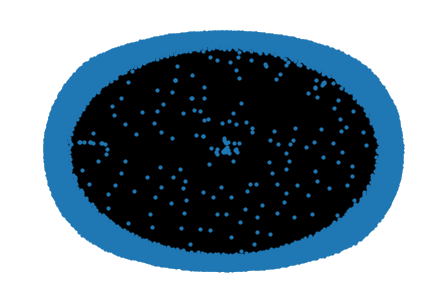

In [25]:
import matplotlib.pyplot as plt
nx.draw(G, node_size=10)

In [23]:
edge_index_w[edge_index_w.trace_id == 599][['src_id', 'dst_id']]

,src_id,dst_id
7624532,4,0
7624533,4,1
7624534,4,2
7624535,4,3
7624536,4,5
...,...,...
7638237,8931,4141
7638238,8937,4141
7638239,8941,4141
7638240,8944,4141


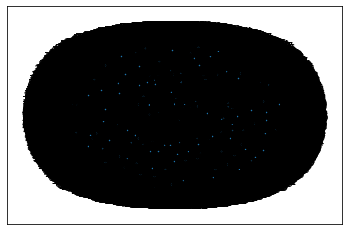

In [28]:
G = nx.DiGraph()
G.add_edges_from(edge_index_w[edge_index_w.trace_id == 599][['src_id', 'dst_id']].values)
nx.draw_networkx(G, node_size=1, arrowsize=1, linewidths=0.5)

### Node Feature

In [65]:
feature_cols = ['trace_id', 'node_id', 'e__0', 'e__1', 'e__2', 'e__3', 'e__4', 'e__5',
       'e__6', 'e__7', 'e__8', 'e__9', 'e__10', 'e__11', 'e__12', 'e__13', 'e__14',
       'e__15', 'e__16', 'e__17', 'e__18', 'e__19', 'e__20', 'e__21', 'e__22', 'e__23',
       'e__24', 'e__25']

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
node_feature_df = []
for gid in tqdm(range(600)):
    gdf = edge_df[edge_df.trace_id == gid]
    gdf = resolve_graph_df(gdf)

    _df = pd.get_dummies(gdf[['trace_id', 'dst_id', 'edge_type']], columns=['edge_type'], prefix='e_').groupby(['trace_id', 'dst_id']).sum() \
        .reset_index().rename(columns={'dst_id': 'node_id'})
    for i in range(max(gdf.src_id.max(), gdf.dst_id.max())):
        if i not in _df.node_id.values:
            print(f'fill in node id {i} ..')
            _tmpdf = pd.DataFrame([[gid, i] + [0.0]*26], columns=feature_cols)
            _df = pd.concat([_df, _tmpdf])
    _df = _df.sort_values(['trace_id', 'node_id']).reset_index(drop=True)
    
    node_feature_df.append(_df)
#     break
node_feature_df = pd.concat(node_feature_df)
node_feature_df

  0%|          | 1/600 [00:00<03:45,  2.66it/s]

fill in node id 4 ..


  0%|          | 2/600 [00:00<03:23,  2.93it/s]

fill in node id 4 ..


  0%|          | 3/600 [00:01<04:32,  2.19it/s]

fill in node id 4 ..


  1%|          | 4/600 [00:01<04:00,  2.47it/s]

fill in node id 4 ..


  1%|          | 5/600 [00:01<03:51,  2.57it/s]

fill in node id 4 ..


  1%|          | 6/600 [00:02<03:50,  2.58it/s]

fill in node id 4 ..


  1%|          | 7/600 [00:02<03:36,  2.74it/s]

fill in node id 4 ..


  1%|▏         | 8/600 [00:03<03:35,  2.75it/s]

fill in node id 4 ..


  2%|▏         | 9/600 [00:03<03:27,  2.85it/s]

fill in node id 4 ..


  2%|▏         | 10/600 [00:03<03:17,  2.98it/s]

fill in node id 4 ..


  2%|▏         | 11/600 [00:04<03:22,  2.92it/s]

fill in node id 4 ..


  2%|▏         | 12/600 [00:04<03:33,  2.75it/s]

fill in node id 4 ..


  2%|▏         | 13/600 [00:04<03:37,  2.70it/s]

fill in node id 4 ..


  2%|▏         | 14/600 [00:05<03:42,  2.64it/s]

fill in node id 4 ..


  2%|▎         | 15/600 [00:05<03:34,  2.72it/s]

fill in node id 4 ..


  3%|▎         | 16/600 [00:05<03:33,  2.73it/s]

fill in node id 4 ..


  3%|▎         | 17/600 [00:06<03:33,  2.73it/s]

fill in node id 4 ..


  3%|▎         | 18/600 [00:06<03:32,  2.74it/s]

fill in node id 4 ..


  3%|▎         | 19/600 [00:07<03:40,  2.63it/s]

fill in node id 4 ..


  3%|▎         | 20/600 [00:07<03:47,  2.55it/s]

fill in node id 4 ..


  4%|▎         | 21/600 [00:07<03:34,  2.70it/s]

fill in node id 4 ..


  4%|▎         | 22/600 [00:08<03:32,  2.72it/s]

fill in node id 4 ..


  4%|▍         | 23/600 [00:08<03:37,  2.65it/s]

fill in node id 4 ..


  4%|▍         | 24/600 [00:08<03:33,  2.70it/s]

fill in node id 4 ..


  4%|▍         | 25/600 [00:09<03:44,  2.56it/s]

fill in node id 4 ..


  4%|▍         | 26/600 [00:09<03:40,  2.61it/s]

fill in node id 4 ..


  4%|▍         | 27/600 [00:10<03:38,  2.62it/s]

fill in node id 4 ..


  5%|▍         | 28/600 [00:10<03:35,  2.66it/s]

fill in node id 4 ..


  5%|▍         | 29/600 [00:11<04:14,  2.24it/s]

fill in node id 4 ..


  5%|▌         | 30/600 [00:11<04:41,  2.02it/s]

fill in node id 4 ..


  5%|▌         | 31/600 [00:12<04:23,  2.16it/s]

fill in node id 4 ..


  5%|▌         | 32/600 [00:12<04:10,  2.27it/s]

fill in node id 4 ..


  6%|▌         | 33/600 [00:12<03:57,  2.39it/s]

fill in node id 4 ..


  6%|▌         | 34/600 [00:13<03:48,  2.48it/s]

fill in node id 4 ..


  6%|▌         | 35/600 [00:13<03:32,  2.66it/s]

fill in node id 4 ..


  6%|▌         | 36/600 [00:13<03:29,  2.69it/s]

fill in node id 4 ..


  6%|▌         | 37/600 [00:14<03:28,  2.71it/s]

fill in node id 4 ..


  6%|▋         | 38/600 [00:14<03:27,  2.70it/s]

fill in node id 4 ..


  6%|▋         | 39/600 [00:15<03:34,  2.61it/s]

fill in node id 4 ..


  7%|▋         | 40/600 [00:15<03:34,  2.61it/s]

fill in node id 4 ..


  7%|▋         | 41/600 [00:15<03:36,  2.59it/s]

fill in node id 4 ..


  7%|▋         | 42/600 [00:16<03:32,  2.62it/s]

fill in node id 4 ..


  7%|▋         | 43/600 [00:16<03:30,  2.65it/s]

fill in node id 4 ..


  7%|▋         | 44/600 [00:16<03:29,  2.66it/s]

fill in node id 4 ..


  8%|▊         | 45/600 [00:17<03:32,  2.61it/s]

fill in node id 4 ..


  8%|▊         | 46/600 [00:17<03:18,  2.79it/s]

fill in node id 4 ..


  8%|▊         | 47/600 [00:17<03:19,  2.77it/s]

fill in node id 4 ..


  8%|▊         | 48/600 [00:18<03:19,  2.77it/s]

fill in node id 4 ..


  8%|▊         | 49/600 [00:18<03:22,  2.73it/s]

fill in node id 4 ..


  8%|▊         | 50/600 [00:19<03:57,  2.32it/s]

fill in node id 4 ..


  8%|▊         | 51/600 [00:19<03:51,  2.37it/s]

fill in node id 4 ..


  9%|▊         | 52/600 [00:20<03:40,  2.48it/s]

fill in node id 4 ..


  9%|▉         | 53/600 [00:20<03:32,  2.58it/s]

fill in node id 4 ..


  9%|▉         | 54/600 [00:20<03:30,  2.60it/s]

fill in node id 4 ..


  9%|▉         | 55/600 [00:21<03:18,  2.74it/s]

fill in node id 4 ..


  9%|▉         | 56/600 [00:21<03:17,  2.75it/s]

fill in node id 4 ..


 10%|▉         | 57/600 [00:21<03:16,  2.76it/s]

fill in node id 4 ..


 10%|▉         | 58/600 [00:22<03:16,  2.76it/s]

fill in node id 4 ..


 10%|▉         | 59/600 [00:22<03:19,  2.71it/s]

fill in node id 4 ..


 10%|█         | 60/600 [00:22<03:21,  2.68it/s]

fill in node id 4 ..


 10%|█         | 61/600 [00:23<03:18,  2.71it/s]

fill in node id 4 ..


 10%|█         | 62/600 [00:23<03:17,  2.72it/s]

fill in node id 4 ..


 10%|█         | 63/600 [00:24<03:53,  2.30it/s]

fill in node id 4 ..


 11%|█         | 64/600 [00:24<03:42,  2.41it/s]

fill in node id 4 ..


 11%|█         | 65/600 [00:25<03:40,  2.43it/s]

fill in node id 4 ..


 11%|█         | 66/600 [00:25<03:31,  2.53it/s]

fill in node id 4 ..


 11%|█         | 67/600 [00:25<04:03,  2.19it/s]

fill in node id 4 ..


 11%|█▏        | 68/600 [00:26<03:47,  2.34it/s]

fill in node id 4 ..


 12%|█▏        | 69/600 [00:26<03:30,  2.53it/s]

fill in node id 4 ..


 12%|█▏        | 70/600 [00:27<03:28,  2.55it/s]

fill in node id 4 ..


 12%|█▏        | 71/600 [00:27<03:22,  2.61it/s]

fill in node id 4 ..


 12%|█▏        | 72/600 [00:28<03:56,  2.23it/s]

fill in node id 4 ..


 12%|█▏        | 73/600 [00:28<03:44,  2.34it/s]

fill in node id 4 ..


 12%|█▏        | 74/600 [00:28<03:38,  2.41it/s]

fill in node id 4 ..


 12%|█▎        | 75/600 [00:29<03:34,  2.45it/s]

fill in node id 4 ..


 13%|█▎        | 76/600 [00:29<03:26,  2.53it/s]

fill in node id 4 ..


 13%|█▎        | 77/600 [00:30<03:59,  2.19it/s]

fill in node id 4 ..


 13%|█▎        | 78/600 [00:30<03:44,  2.33it/s]

fill in node id 4 ..


 13%|█▎        | 79/600 [00:30<03:33,  2.45it/s]

fill in node id 4 ..


 13%|█▎        | 80/600 [00:31<03:28,  2.50it/s]

fill in node id 4 ..


 14%|█▎        | 81/600 [00:31<03:22,  2.57it/s]

fill in node id 4 ..


 14%|█▎        | 82/600 [00:31<03:17,  2.62it/s]

fill in node id 4 ..


 14%|█▍        | 83/600 [00:32<03:50,  2.24it/s]

fill in node id 4 ..


 14%|█▍        | 84/600 [00:32<03:35,  2.39it/s]

fill in node id 4 ..


 14%|█▍        | 85/600 [00:33<03:25,  2.50it/s]

fill in node id 4 ..


 14%|█▍        | 86/600 [00:33<03:08,  2.73it/s]

fill in node id 4 ..


 14%|█▍        | 87/600 [00:33<03:10,  2.69it/s]

fill in node id 4 ..


 15%|█▍        | 88/600 [00:34<03:43,  2.29it/s]

fill in node id 4 ..


 15%|█▍        | 89/600 [00:34<03:30,  2.42it/s]

fill in node id 4 ..


 15%|█▌        | 90/600 [00:35<03:23,  2.51it/s]

fill in node id 4 ..


 15%|█▌        | 91/600 [00:35<03:25,  2.48it/s]

fill in node id 4 ..


 15%|█▌        | 92/600 [00:36<03:55,  2.16it/s]

fill in node id 4 ..


 16%|█▌        | 93/600 [00:36<03:42,  2.28it/s]

fill in node id 4 ..


 16%|█▌        | 94/600 [00:37<03:30,  2.40it/s]

fill in node id 4 ..


 16%|█▌        | 95/600 [00:37<03:22,  2.50it/s]

fill in node id 4 ..


 16%|█▌        | 96/600 [00:37<03:15,  2.58it/s]

fill in node id 4 ..


 16%|█▌        | 97/600 [00:38<03:04,  2.73it/s]

fill in node id 4 ..


 16%|█▋        | 98/600 [00:38<03:02,  2.74it/s]

fill in node id 4 ..


 16%|█▋        | 99/600 [00:38<03:05,  2.70it/s]

fill in node id 4 ..


 17%|█▋        | 100/600 [00:39<02:57,  2.82it/s]

fill in node id 4 ..


 17%|█▋        | 101/600 [00:39<02:37,  3.16it/s]

fill in node id 4 ..


 17%|█▋        | 102/600 [00:39<02:22,  3.48it/s]

fill in node id 4 ..


 17%|█▋        | 103/600 [00:39<02:11,  3.79it/s]

fill in node id 4 ..


 17%|█▋        | 104/600 [00:39<02:02,  4.05it/s]

fill in node id 4 ..


 18%|█▊        | 105/600 [00:40<01:55,  4.27it/s]

fill in node id 4 ..


 18%|█▊        | 106/600 [00:40<01:55,  4.30it/s]

fill in node id 4 ..


 18%|█▊        | 107/600 [00:40<01:53,  4.35it/s]

fill in node id 4 ..


 18%|█▊        | 108/600 [00:40<01:51,  4.40it/s]

fill in node id 4 ..


 18%|█▊        | 109/600 [00:41<01:49,  4.47it/s]

fill in node id 4 ..


 18%|█▊        | 110/600 [00:41<01:49,  4.48it/s]

fill in node id 4 ..


 18%|█▊        | 111/600 [00:41<01:46,  4.58it/s]

fill in node id 4 ..


 19%|█▊        | 112/600 [00:41<01:46,  4.59it/s]

fill in node id 4 ..


 19%|█▉        | 113/600 [00:41<01:46,  4.56it/s]

fill in node id 4 ..
fill in node id 4 ..


 19%|█▉        | 115/600 [00:42<01:42,  4.72it/s]

fill in node id 4 ..


 19%|█▉        | 116/600 [00:42<01:52,  4.30it/s]

fill in node id 4 ..


 20%|█▉        | 117/600 [00:42<01:49,  4.43it/s]

fill in node id 4 ..


 20%|█▉        | 118/600 [00:43<01:46,  4.54it/s]

fill in node id 4 ..


 20%|█▉        | 119/600 [00:43<01:45,  4.55it/s]

fill in node id 4 ..


 20%|██        | 120/600 [00:43<01:43,  4.64it/s]

fill in node id 4 ..


 20%|██        | 121/600 [00:43<01:41,  4.72it/s]

fill in node id 4 ..


 20%|██        | 122/600 [00:43<01:42,  4.68it/s]

fill in node id 4 ..


 20%|██        | 123/600 [00:44<01:42,  4.66it/s]

fill in node id 4 ..


 21%|██        | 124/600 [00:44<01:43,  4.62it/s]

fill in node id 4 ..


 21%|██        | 125/600 [00:44<01:43,  4.60it/s]

fill in node id 4 ..


 21%|██        | 126/600 [00:44<01:41,  4.68it/s]

fill in node id 4 ..


 21%|██        | 127/600 [00:44<01:40,  4.72it/s]

fill in node id 4 ..


 21%|██▏       | 128/600 [00:45<01:39,  4.73it/s]

fill in node id 4 ..


 22%|██▏       | 129/600 [00:45<01:38,  4.76it/s]

fill in node id 4 ..


 22%|██▏       | 130/600 [00:45<01:41,  4.62it/s]

fill in node id 4 ..


 22%|██▏       | 131/600 [00:45<01:41,  4.61it/s]

fill in node id 4 ..


 22%|██▏       | 132/600 [00:46<01:41,  4.62it/s]

fill in node id 4 ..


 22%|██▏       | 133/600 [00:46<01:40,  4.66it/s]

fill in node id 4 ..


 22%|██▏       | 134/600 [00:46<01:38,  4.72it/s]

fill in node id 4 ..


 22%|██▎       | 135/600 [00:46<01:40,  4.64it/s]

fill in node id 4 ..


 23%|██▎       | 136/600 [00:46<01:48,  4.29it/s]

fill in node id 4 ..


 23%|██▎       | 137/600 [00:47<01:48,  4.28it/s]

fill in node id 4 ..


 23%|██▎       | 138/600 [00:47<01:45,  4.37it/s]

fill in node id 4 ..


 23%|██▎       | 139/600 [00:47<01:44,  4.42it/s]

fill in node id 4 ..


 23%|██▎       | 140/600 [00:47<01:46,  4.33it/s]

fill in node id 4 ..


 24%|██▎       | 141/600 [00:48<01:42,  4.48it/s]

fill in node id 4 ..


 24%|██▎       | 142/600 [00:48<01:41,  4.50it/s]

fill in node id 4 ..


 24%|██▍       | 143/600 [00:48<01:40,  4.56it/s]

fill in node id 4 ..


 24%|██▍       | 144/600 [00:48<01:40,  4.53it/s]

fill in node id 4 ..


 24%|██▍       | 145/600 [00:48<01:38,  4.63it/s]

fill in node id 4 ..


 24%|██▍       | 146/600 [00:49<01:38,  4.60it/s]

fill in node id 4 ..


 24%|██▍       | 147/600 [00:49<01:40,  4.52it/s]

fill in node id 4 ..


 25%|██▍       | 148/600 [00:49<01:40,  4.52it/s]

fill in node id 4 ..


 25%|██▍       | 149/600 [00:49<01:39,  4.51it/s]

fill in node id 4 ..


 25%|██▌       | 150/600 [00:50<01:39,  4.52it/s]

fill in node id 4 ..


 25%|██▌       | 151/600 [00:50<01:37,  4.60it/s]

fill in node id 4 ..


 25%|██▌       | 152/600 [00:50<01:36,  4.67it/s]

fill in node id 4 ..


 26%|██▌       | 153/600 [00:50<01:36,  4.61it/s]

fill in node id 4 ..


 26%|██▌       | 154/600 [00:50<01:37,  4.56it/s]

fill in node id 4 ..


 26%|██▌       | 155/600 [00:51<01:39,  4.48it/s]

fill in node id 4 ..


 26%|██▌       | 156/600 [00:51<01:36,  4.61it/s]

fill in node id 4 ..


 26%|██▌       | 157/600 [00:51<01:36,  4.60it/s]

fill in node id 4 ..


 26%|██▋       | 158/600 [00:51<01:34,  4.68it/s]

fill in node id 4 ..


 26%|██▋       | 159/600 [00:51<01:32,  4.75it/s]

fill in node id 4 ..


 27%|██▋       | 160/600 [00:52<01:33,  4.69it/s]

fill in node id 4 ..


 27%|██▋       | 161/600 [00:52<01:33,  4.67it/s]

fill in node id 4 ..


 27%|██▋       | 162/600 [00:52<01:34,  4.61it/s]

fill in node id 4 ..


 27%|██▋       | 163/600 [00:52<01:33,  4.68it/s]

fill in node id 4 ..


 27%|██▋       | 164/600 [00:53<01:32,  4.73it/s]

fill in node id 4 ..
fill in node id 4 ..


 28%|██▊       | 166/600 [00:53<01:30,  4.78it/s]

fill in node id 4 ..


 28%|██▊       | 167/600 [00:53<01:32,  4.70it/s]

fill in node id 4 ..


 28%|██▊       | 168/600 [00:53<01:33,  4.62it/s]

fill in node id 4 ..


 28%|██▊       | 169/600 [00:54<01:35,  4.52it/s]

fill in node id 4 ..


 28%|██▊       | 170/600 [00:54<01:32,  4.64it/s]

fill in node id 4 ..


 28%|██▊       | 171/600 [00:54<01:31,  4.70it/s]

fill in node id 4 ..


 29%|██▊       | 172/600 [00:54<01:30,  4.75it/s]

fill in node id 4 ..


 29%|██▉       | 173/600 [00:54<01:29,  4.77it/s]

fill in node id 4 ..


 29%|██▉       | 174/600 [00:55<01:29,  4.78it/s]

fill in node id 4 ..


 29%|██▉       | 175/600 [00:55<01:28,  4.81it/s]

fill in node id 4 ..


 29%|██▉       | 176/600 [00:55<01:29,  4.72it/s]

fill in node id 4 ..
fill in node id 4 ..


 30%|██▉       | 178/600 [00:56<01:30,  4.65it/s]

fill in node id 4 ..


 30%|██▉       | 179/600 [00:56<01:29,  4.71it/s]

fill in node id 4 ..


 30%|███       | 180/600 [00:56<01:28,  4.75it/s]

fill in node id 4 ..


 30%|███       | 181/600 [00:56<01:27,  4.79it/s]

fill in node id 4 ..


 30%|███       | 182/600 [00:56<01:28,  4.71it/s]

fill in node id 4 ..


 30%|███       | 183/600 [00:57<01:29,  4.65it/s]

fill in node id 4 ..


 31%|███       | 184/600 [00:57<01:28,  4.68it/s]

fill in node id 4 ..


 31%|███       | 185/600 [00:57<01:29,  4.63it/s]

fill in node id 4 ..


 31%|███       | 186/600 [00:57<01:28,  4.68it/s]

fill in node id 4 ..


 31%|███       | 187/600 [00:57<01:30,  4.54it/s]

fill in node id 4 ..


 31%|███▏      | 188/600 [00:58<01:28,  4.64it/s]

fill in node id 4 ..


 32%|███▏      | 189/600 [00:58<01:27,  4.68it/s]

fill in node id 4 ..


 32%|███▏      | 190/600 [00:58<01:26,  4.71it/s]

fill in node id 4 ..


 32%|███▏      | 191/600 [00:58<01:26,  4.75it/s]

fill in node id 4 ..


 32%|███▏      | 192/600 [00:59<01:25,  4.77it/s]

fill in node id 4 ..


 32%|███▏      | 193/600 [00:59<01:25,  4.78it/s]

fill in node id 4 ..


 32%|███▏      | 194/600 [00:59<01:26,  4.68it/s]

fill in node id 4 ..


 32%|███▎      | 195/600 [00:59<01:27,  4.64it/s]

fill in node id 4 ..


 33%|███▎      | 196/600 [00:59<01:27,  4.62it/s]

fill in node id 4 ..


 33%|███▎      | 197/600 [01:00<01:26,  4.68it/s]

fill in node id 4 ..


 33%|███▎      | 198/600 [01:00<01:26,  4.64it/s]

fill in node id 4 ..


 33%|███▎      | 199/600 [01:00<01:25,  4.67it/s]

fill in node id 4 ..


 33%|███▎      | 200/600 [01:00<01:26,  4.63it/s]

fill in node id 4 ..


 34%|███▎      | 201/600 [01:01<01:46,  3.76it/s]

fill in node id 4 ..


 34%|███▎      | 202/600 [01:01<01:57,  3.39it/s]

fill in node id 4 ..


 34%|███▍      | 203/600 [01:01<02:13,  2.97it/s]

fill in node id 4 ..


 34%|███▍      | 204/600 [01:02<02:24,  2.74it/s]

fill in node id 4 ..


 34%|███▍      | 205/600 [01:02<02:22,  2.77it/s]

fill in node id 4 ..


 34%|███▍      | 206/600 [01:03<02:21,  2.78it/s]

fill in node id 4 ..


 34%|███▍      | 207/600 [01:03<02:20,  2.79it/s]

fill in node id 4 ..


 35%|███▍      | 208/600 [01:03<02:23,  2.74it/s]

fill in node id 4 ..


 35%|███▍      | 209/600 [01:04<02:20,  2.78it/s]

fill in node id 4 ..


 35%|███▌      | 210/600 [01:04<02:26,  2.66it/s]

fill in node id 4 ..


 35%|███▌      | 211/600 [01:04<02:26,  2.65it/s]

fill in node id 4 ..


 35%|███▌      | 212/600 [01:05<02:28,  2.62it/s]

fill in node id 4 ..


 36%|███▌      | 213/600 [01:05<02:24,  2.69it/s]

fill in node id 4 ..


 36%|███▌      | 214/600 [01:06<02:21,  2.73it/s]

fill in node id 4 ..


 36%|███▌      | 215/600 [01:06<02:20,  2.74it/s]

fill in node id 4 ..


 36%|███▌      | 216/600 [01:06<02:18,  2.77it/s]

fill in node id 4 ..


 36%|███▌      | 217/600 [01:07<02:20,  2.72it/s]

fill in node id 4 ..


 36%|███▋      | 218/600 [01:07<02:20,  2.72it/s]

fill in node id 4 ..


 36%|███▋      | 219/600 [01:08<02:52,  2.21it/s]

fill in node id 4 ..


 37%|███▋      | 220/600 [01:08<02:40,  2.36it/s]

fill in node id 4 ..


 37%|███▋      | 221/600 [01:08<02:33,  2.48it/s]

fill in node id 4 ..


 37%|███▋      | 222/600 [01:09<02:34,  2.45it/s]

fill in node id 4 ..


 37%|███▋      | 223/600 [01:09<02:26,  2.57it/s]

fill in node id 4 ..


 37%|███▋      | 224/600 [01:09<02:21,  2.65it/s]

fill in node id 4 ..


 38%|███▊      | 225/600 [01:10<02:17,  2.72it/s]

fill in node id 4 ..


 38%|███▊      | 226/600 [01:10<02:15,  2.75it/s]

fill in node id 4 ..


 38%|███▊      | 227/600 [01:11<02:21,  2.64it/s]

fill in node id 4 ..


 38%|███▊      | 228/600 [01:11<02:25,  2.55it/s]

fill in node id 4 ..


 38%|███▊      | 229/600 [01:11<02:20,  2.64it/s]

fill in node id 4 ..


 38%|███▊      | 230/600 [01:12<02:21,  2.62it/s]

fill in node id 4 ..


 38%|███▊      | 231/600 [01:12<02:17,  2.69it/s]

fill in node id 4 ..


 39%|███▊      | 232/600 [01:12<02:19,  2.64it/s]

fill in node id 4 ..


 39%|███▉      | 233/600 [01:13<02:16,  2.70it/s]

fill in node id 4 ..


 39%|███▉      | 234/600 [01:13<02:16,  2.69it/s]

fill in node id 4 ..


 39%|███▉      | 235/600 [01:14<02:24,  2.53it/s]

fill in node id 4 ..


 39%|███▉      | 236/600 [01:14<02:19,  2.61it/s]

fill in node id 4 ..


 40%|███▉      | 237/600 [01:14<02:28,  2.45it/s]

fill in node id 4 ..


 40%|███▉      | 238/600 [01:15<02:21,  2.57it/s]

fill in node id 4 ..


 40%|███▉      | 239/600 [01:15<02:30,  2.41it/s]

fill in node id 4 ..


 40%|████      | 240/600 [01:16<02:29,  2.40it/s]

fill in node id 4 ..


 40%|████      | 241/600 [01:16<02:30,  2.39it/s]

fill in node id 4 ..


 40%|████      | 242/600 [01:17<02:24,  2.48it/s]

fill in node id 4 ..


 40%|████      | 243/600 [01:17<02:19,  2.57it/s]

fill in node id 4 ..


 41%|████      | 244/600 [01:17<02:25,  2.44it/s]

fill in node id 4 ..


 41%|████      | 245/600 [01:18<02:24,  2.46it/s]

fill in node id 4 ..


 41%|████      | 246/600 [01:18<02:18,  2.56it/s]

fill in node id 4 ..


 41%|████      | 247/600 [01:18<02:14,  2.63it/s]

fill in node id 4 ..


 41%|████▏     | 248/600 [01:19<02:18,  2.55it/s]

fill in node id 4 ..


 42%|████▏     | 249/600 [01:19<02:19,  2.52it/s]

fill in node id 4 ..


 42%|████▏     | 250/600 [01:20<02:14,  2.60it/s]

fill in node id 4 ..


 42%|████▏     | 251/600 [01:20<02:14,  2.59it/s]

fill in node id 4 ..


 42%|████▏     | 252/600 [01:20<02:17,  2.52it/s]

fill in node id 4 ..


 42%|████▏     | 253/600 [01:21<02:26,  2.37it/s]

fill in node id 4 ..


 42%|████▏     | 254/600 [01:21<02:19,  2.48it/s]

fill in node id 4 ..


 42%|████▎     | 255/600 [01:22<02:15,  2.55it/s]

fill in node id 4 ..


 43%|████▎     | 256/600 [01:22<02:11,  2.62it/s]

fill in node id 4 ..


 43%|████▎     | 257/600 [01:22<02:17,  2.49it/s]

fill in node id 4 ..


 43%|████▎     | 258/600 [01:23<02:11,  2.60it/s]

fill in node id 4 ..


 43%|████▎     | 259/600 [01:23<02:14,  2.53it/s]

fill in node id 4 ..


 43%|████▎     | 260/600 [01:24<02:17,  2.48it/s]

fill in node id 4 ..


 44%|████▎     | 261/600 [01:24<02:14,  2.52it/s]

fill in node id 4 ..


 44%|████▎     | 262/600 [01:24<02:13,  2.54it/s]

fill in node id 4 ..


 44%|████▍     | 263/600 [01:25<02:09,  2.60it/s]

fill in node id 4 ..


 44%|████▍     | 264/600 [01:25<02:06,  2.66it/s]

fill in node id 4 ..


 44%|████▍     | 265/600 [01:26<02:16,  2.45it/s]

fill in node id 4 ..


 44%|████▍     | 266/600 [01:26<02:11,  2.54it/s]

fill in node id 4 ..


 44%|████▍     | 267/600 [01:26<02:14,  2.48it/s]

fill in node id 4 ..


 45%|████▍     | 268/600 [01:27<02:09,  2.56it/s]

fill in node id 4 ..


 45%|████▍     | 269/600 [01:27<02:13,  2.48it/s]

fill in node id 4 ..


 45%|████▌     | 270/600 [01:28<02:10,  2.54it/s]

fill in node id 4 ..


 45%|████▌     | 271/600 [01:28<02:07,  2.57it/s]

fill in node id 4 ..


 45%|████▌     | 272/600 [01:28<02:08,  2.55it/s]

fill in node id 4 ..


 46%|████▌     | 273/600 [01:29<02:16,  2.39it/s]

fill in node id 4 ..


 46%|████▌     | 274/600 [01:29<02:11,  2.49it/s]

fill in node id 4 ..


 46%|████▌     | 275/600 [01:30<02:06,  2.58it/s]

fill in node id 4 ..


 46%|████▌     | 276/600 [01:30<02:08,  2.51it/s]

fill in node id 4 ..


 46%|████▌     | 277/600 [01:30<02:11,  2.45it/s]

fill in node id 4 ..


 46%|████▋     | 278/600 [01:31<02:13,  2.41it/s]

fill in node id 4 ..


 46%|████▋     | 279/600 [01:31<02:09,  2.48it/s]

fill in node id 4 ..


 47%|████▋     | 280/600 [01:32<02:11,  2.44it/s]

fill in node id 4 ..


 47%|████▋     | 281/600 [01:32<02:09,  2.46it/s]

fill in node id 4 ..


 47%|████▋     | 282/600 [01:32<02:04,  2.55it/s]

fill in node id 4 ..


 47%|████▋     | 283/600 [01:33<02:01,  2.62it/s]

fill in node id 4 ..


 47%|████▋     | 284/600 [01:33<01:59,  2.65it/s]

fill in node id 4 ..


 48%|████▊     | 285/600 [01:34<02:02,  2.56it/s]

fill in node id 4 ..


 48%|████▊     | 286/600 [01:34<02:06,  2.49it/s]

fill in node id 4 ..


 48%|████▊     | 287/600 [01:34<02:02,  2.55it/s]

fill in node id 4 ..


 48%|████▊     | 288/600 [01:35<01:59,  2.61it/s]

fill in node id 4 ..


 48%|████▊     | 289/600 [01:35<01:56,  2.66it/s]

fill in node id 4 ..


 48%|████▊     | 290/600 [01:36<02:12,  2.34it/s]

fill in node id 4 ..


 48%|████▊     | 291/600 [01:36<02:13,  2.32it/s]

fill in node id 4 ..


 49%|████▊     | 292/600 [01:37<02:19,  2.20it/s]

fill in node id 4 ..


 49%|████▉     | 293/600 [01:37<02:10,  2.34it/s]

fill in node id 4 ..


 49%|████▉     | 294/600 [01:37<02:03,  2.47it/s]

fill in node id 4 ..


 49%|████▉     | 295/600 [01:38<02:05,  2.43it/s]

fill in node id 4 ..


 49%|████▉     | 296/600 [01:38<02:01,  2.50it/s]

fill in node id 4 ..


 50%|████▉     | 297/600 [01:38<02:01,  2.50it/s]

fill in node id 4 ..


 50%|████▉     | 298/600 [01:39<01:56,  2.58it/s]

fill in node id 4 ..


 50%|████▉     | 299/600 [01:39<02:00,  2.49it/s]

fill in node id 4 ..


 50%|█████     | 300/600 [01:40<02:02,  2.45it/s]

fill in node id 4 ..


 50%|█████     | 301/600 [01:40<01:46,  2.81it/s]

fill in node id 4 ..


 50%|█████     | 302/600 [01:40<01:35,  3.13it/s]

fill in node id 4 ..


 50%|█████     | 303/600 [01:40<01:27,  3.41it/s]

fill in node id 4 ..


 51%|█████     | 304/600 [01:41<01:21,  3.64it/s]

fill in node id 4 ..


 51%|█████     | 305/600 [01:41<01:17,  3.80it/s]

fill in node id 4 ..


 51%|█████     | 306/600 [01:41<01:14,  3.95it/s]

fill in node id 4 ..


 51%|█████     | 307/600 [01:41<01:12,  4.06it/s]

fill in node id 4 ..


 51%|█████▏    | 308/600 [01:42<01:10,  4.11it/s]

fill in node id 4 ..


 52%|█████▏    | 309/600 [01:42<01:09,  4.17it/s]

fill in node id 4 ..


 52%|█████▏    | 310/600 [01:42<01:08,  4.22it/s]

fill in node id 4 ..


 52%|█████▏    | 311/600 [01:42<01:08,  4.25it/s]

fill in node id 4 ..


 52%|█████▏    | 312/600 [01:42<01:07,  4.26it/s]

fill in node id 4 ..


 52%|█████▏    | 313/600 [01:43<01:07,  4.27it/s]

fill in node id 4 ..


 52%|█████▏    | 314/600 [01:43<01:07,  4.27it/s]

fill in node id 4 ..


 52%|█████▎    | 315/600 [01:43<01:06,  4.29it/s]

fill in node id 4 ..


 53%|█████▎    | 316/600 [01:43<01:06,  4.30it/s]

fill in node id 4 ..


 53%|█████▎    | 317/600 [01:44<01:05,  4.32it/s]

fill in node id 4 ..


 53%|█████▎    | 318/600 [01:44<01:05,  4.32it/s]

fill in node id 4 ..


 53%|█████▎    | 319/600 [01:44<01:04,  4.33it/s]

fill in node id 4 ..


 53%|█████▎    | 320/600 [01:44<01:04,  4.32it/s]

fill in node id 4 ..


 54%|█████▎    | 321/600 [01:45<01:04,  4.30it/s]

fill in node id 4 ..


 54%|█████▎    | 322/600 [01:45<01:04,  4.31it/s]

fill in node id 4 ..


 54%|█████▍    | 323/600 [01:45<01:04,  4.33it/s]

fill in node id 4 ..


 54%|█████▍    | 324/600 [01:45<01:03,  4.32it/s]

fill in node id 4 ..


 54%|█████▍    | 325/600 [01:45<01:03,  4.33it/s]

fill in node id 4 ..


 54%|█████▍    | 326/600 [01:46<01:03,  4.34it/s]

fill in node id 4 ..


 55%|█████▍    | 327/600 [01:46<01:04,  4.24it/s]

fill in node id 4 ..


 55%|█████▍    | 328/600 [01:46<01:03,  4.27it/s]

fill in node id 4 ..


 55%|█████▍    | 329/600 [01:46<01:03,  4.27it/s]

fill in node id 4 ..


 55%|█████▌    | 330/600 [01:47<01:02,  4.29it/s]

fill in node id 4 ..


 55%|█████▌    | 331/600 [01:47<01:02,  4.28it/s]

fill in node id 4 ..


 55%|█████▌    | 332/600 [01:47<01:01,  4.39it/s]

fill in node id 4 ..


 56%|█████▌    | 333/600 [01:47<01:01,  4.35it/s]

fill in node id 4 ..


 56%|█████▌    | 334/600 [01:48<00:59,  4.47it/s]

fill in node id 4 ..


 56%|█████▌    | 335/600 [01:48<00:58,  4.56it/s]

fill in node id 4 ..


 56%|█████▌    | 336/600 [01:48<00:58,  4.50it/s]

fill in node id 4 ..


 56%|█████▌    | 337/600 [01:48<00:58,  4.46it/s]

fill in node id 4 ..


 56%|█████▋    | 338/600 [01:48<01:00,  4.36it/s]

fill in node id 4 ..


 56%|█████▋    | 339/600 [01:49<01:00,  4.33it/s]

fill in node id 4 ..


 57%|█████▋    | 340/600 [01:49<01:00,  4.33it/s]

fill in node id 4 ..


 57%|█████▋    | 341/600 [01:49<00:59,  4.35it/s]

fill in node id 4 ..


 57%|█████▋    | 342/600 [01:49<00:59,  4.35it/s]

fill in node id 4 ..


 57%|█████▋    | 343/600 [01:50<00:58,  4.36it/s]

fill in node id 4 ..


 57%|█████▋    | 344/600 [01:50<00:59,  4.33it/s]

fill in node id 4 ..


 57%|█████▊    | 345/600 [01:50<00:58,  4.33it/s]

fill in node id 4 ..


 58%|█████▊    | 346/600 [01:50<00:58,  4.35it/s]

fill in node id 4 ..


 58%|█████▊    | 347/600 [01:51<00:58,  4.33it/s]

fill in node id 4 ..


 58%|█████▊    | 348/600 [01:51<00:58,  4.34it/s]

fill in node id 4 ..


 58%|█████▊    | 349/600 [01:51<00:57,  4.33it/s]

fill in node id 4 ..


 58%|█████▊    | 350/600 [01:51<00:57,  4.34it/s]

fill in node id 4 ..


 58%|█████▊    | 351/600 [01:51<00:57,  4.32it/s]

fill in node id 4 ..


 59%|█████▊    | 352/600 [01:52<00:57,  4.32it/s]

fill in node id 4 ..


 59%|█████▉    | 353/600 [01:52<00:57,  4.32it/s]

fill in node id 4 ..


 59%|█████▉    | 354/600 [01:52<00:57,  4.31it/s]

fill in node id 4 ..


 59%|█████▉    | 355/600 [01:52<00:57,  4.27it/s]

fill in node id 4 ..


 59%|█████▉    | 356/600 [01:53<00:56,  4.28it/s]

fill in node id 4 ..


 60%|█████▉    | 357/600 [01:53<00:56,  4.30it/s]

fill in node id 4 ..


 60%|█████▉    | 358/600 [01:53<00:58,  4.10it/s]

fill in node id 4 ..


 60%|█████▉    | 359/600 [01:53<00:58,  4.15it/s]

fill in node id 4 ..


 60%|██████    | 360/600 [01:54<00:56,  4.21it/s]

fill in node id 4 ..


 60%|██████    | 361/600 [01:54<00:56,  4.23it/s]

fill in node id 4 ..


 60%|██████    | 362/600 [01:54<00:55,  4.26it/s]

fill in node id 4 ..


 60%|██████    | 363/600 [01:54<00:55,  4.27it/s]

fill in node id 4 ..


 61%|██████    | 364/600 [01:55<00:55,  4.25it/s]

fill in node id 4 ..


 61%|██████    | 365/600 [01:55<00:54,  4.29it/s]

fill in node id 4 ..


 61%|██████    | 366/600 [01:55<00:54,  4.29it/s]

fill in node id 4 ..


 61%|██████    | 367/600 [01:55<00:54,  4.31it/s]

fill in node id 4 ..


 61%|██████▏   | 368/600 [01:55<00:53,  4.33it/s]

fill in node id 4 ..


 62%|██████▏   | 369/600 [01:56<00:53,  4.31it/s]

fill in node id 4 ..


 62%|██████▏   | 370/600 [01:56<00:53,  4.27it/s]

fill in node id 4 ..


 62%|██████▏   | 371/600 [01:56<00:53,  4.28it/s]

fill in node id 4 ..


 62%|██████▏   | 372/600 [01:56<00:53,  4.28it/s]

fill in node id 4 ..


 62%|██████▏   | 373/600 [01:57<00:53,  4.28it/s]

fill in node id 4 ..


 62%|██████▏   | 374/600 [01:57<00:52,  4.28it/s]

fill in node id 4 ..


 62%|██████▎   | 375/600 [01:57<00:52,  4.29it/s]

fill in node id 4 ..


 63%|██████▎   | 376/600 [01:57<00:52,  4.31it/s]

fill in node id 4 ..


 63%|██████▎   | 377/600 [01:58<00:51,  4.33it/s]

fill in node id 4 ..


 63%|██████▎   | 378/600 [01:58<00:51,  4.34it/s]

fill in node id 4 ..


 63%|██████▎   | 379/600 [01:58<00:50,  4.34it/s]

fill in node id 4 ..


 63%|██████▎   | 380/600 [01:58<00:50,  4.34it/s]

fill in node id 4 ..


 64%|██████▎   | 381/600 [01:58<00:50,  4.33it/s]

fill in node id 4 ..


 64%|██████▎   | 382/600 [01:59<00:50,  4.34it/s]

fill in node id 4 ..


 64%|██████▍   | 383/600 [01:59<00:50,  4.34it/s]

fill in node id 4 ..


 64%|██████▍   | 384/600 [01:59<00:48,  4.46it/s]

fill in node id 4 ..


 64%|██████▍   | 385/600 [01:59<00:48,  4.43it/s]

fill in node id 4 ..


 64%|██████▍   | 386/600 [02:00<00:49,  4.35it/s]

fill in node id 4 ..


 64%|██████▍   | 387/600 [02:00<00:49,  4.33it/s]

fill in node id 4 ..


 65%|██████▍   | 388/600 [02:00<00:49,  4.32it/s]

fill in node id 4 ..


 65%|██████▍   | 389/600 [02:00<00:47,  4.41it/s]

fill in node id 4 ..


 65%|██████▌   | 390/600 [02:01<00:48,  4.37it/s]

fill in node id 4 ..


 65%|██████▌   | 391/600 [02:01<00:48,  4.35it/s]

fill in node id 4 ..


 65%|██████▌   | 392/600 [02:01<00:47,  4.38it/s]

fill in node id 4 ..


 66%|██████▌   | 393/600 [02:01<00:47,  4.39it/s]

fill in node id 4 ..


 66%|██████▌   | 394/600 [02:01<00:46,  4.38it/s]

fill in node id 4 ..


 66%|██████▌   | 395/600 [02:02<00:46,  4.39it/s]

fill in node id 4 ..


 66%|██████▌   | 396/600 [02:02<00:46,  4.39it/s]

fill in node id 4 ..


 66%|██████▌   | 397/600 [02:02<00:46,  4.37it/s]

fill in node id 4 ..


 66%|██████▋   | 398/600 [02:02<00:46,  4.37it/s]

fill in node id 4 ..


 66%|██████▋   | 399/600 [02:03<00:46,  4.37it/s]

fill in node id 4 ..


 67%|██████▋   | 400/600 [02:03<00:45,  4.35it/s]

fill in node id 4 ..


 67%|██████▋   | 401/600 [02:04<01:29,  2.23it/s]

fill in node id 4 ..


 67%|██████▋   | 402/600 [02:05<01:59,  1.66it/s]

fill in node id 4 ..


 67%|██████▋   | 403/600 [02:05<02:04,  1.58it/s]

fill in node id 4 ..


 67%|██████▋   | 404/600 [02:06<02:25,  1.34it/s]

fill in node id 4 ..


 68%|██████▊   | 405/600 [02:07<02:41,  1.21it/s]

fill in node id 4 ..


 68%|██████▊   | 406/600 [02:08<02:52,  1.13it/s]

fill in node id 4 ..


 68%|██████▊   | 407/600 [02:09<02:52,  1.12it/s]

fill in node id 4 ..


 68%|██████▊   | 408/600 [02:10<02:55,  1.10it/s]

fill in node id 4 ..


 68%|██████▊   | 409/600 [02:11<02:56,  1.08it/s]

fill in node id 4 ..


 68%|██████▊   | 410/600 [02:12<03:03,  1.04it/s]

fill in node id 4 ..


 68%|██████▊   | 411/600 [02:13<02:52,  1.09it/s]

fill in node id 4 ..


 69%|██████▊   | 412/600 [02:14<02:50,  1.10it/s]

fill in node id 4 ..


 69%|██████▉   | 413/600 [02:15<02:41,  1.16it/s]

fill in node id 4 ..


 69%|██████▉   | 414/600 [02:16<02:42,  1.14it/s]

fill in node id 4 ..


 69%|██████▉   | 415/600 [02:17<02:39,  1.16it/s]

fill in node id 4 ..


 69%|██████▉   | 416/600 [02:18<02:44,  1.12it/s]

fill in node id 4 ..


 70%|██████▉   | 417/600 [02:18<02:44,  1.12it/s]

fill in node id 4 ..


 70%|██████▉   | 418/600 [02:20<02:53,  1.05it/s]

fill in node id 4 ..


 70%|██████▉   | 419/600 [02:20<02:52,  1.05it/s]

fill in node id 4 ..


 70%|███████   | 420/600 [02:22<03:00,  1.00s/it]

fill in node id 4 ..


 70%|███████   | 421/600 [02:23<03:12,  1.08s/it]

fill in node id 4 ..


 70%|███████   | 422/600 [02:24<03:07,  1.05s/it]

fill in node id 4 ..


 70%|███████   | 423/600 [02:25<02:54,  1.01it/s]

fill in node id 4 ..


 71%|███████   | 424/600 [02:25<02:39,  1.11it/s]

fill in node id 4 ..


 71%|███████   | 425/600 [02:26<02:40,  1.09it/s]

fill in node id 4 ..


 71%|███████   | 426/600 [02:27<02:35,  1.12it/s]

fill in node id 4 ..


 71%|███████   | 427/600 [02:28<02:30,  1.15it/s]

fill in node id 4 ..


 71%|███████▏  | 428/600 [02:29<02:31,  1.13it/s]

fill in node id 4 ..


 72%|███████▏  | 429/600 [02:30<02:24,  1.19it/s]

fill in node id 4 ..


 72%|███████▏  | 430/600 [02:30<02:19,  1.22it/s]

fill in node id 4 ..


 72%|███████▏  | 431/600 [02:31<02:13,  1.26it/s]

fill in node id 4 ..


 72%|███████▏  | 432/600 [02:32<02:19,  1.21it/s]

fill in node id 4 ..


 72%|███████▏  | 433/600 [02:33<02:27,  1.13it/s]

fill in node id 4 ..


 72%|███████▏  | 434/600 [02:34<02:28,  1.11it/s]

fill in node id 4 ..


 72%|███████▎  | 435/600 [02:35<02:17,  1.20it/s]

fill in node id 4 ..


 73%|███████▎  | 436/600 [02:36<02:20,  1.17it/s]

fill in node id 4 ..


 73%|███████▎  | 437/600 [02:36<02:12,  1.23it/s]

fill in node id 4 ..


 73%|███████▎  | 438/600 [02:37<02:02,  1.32it/s]

fill in node id 4 ..


 73%|███████▎  | 439/600 [02:38<01:58,  1.36it/s]

fill in node id 4 ..


 73%|███████▎  | 440/600 [02:38<01:53,  1.41it/s]

fill in node id 4 ..


 74%|███████▎  | 441/600 [02:39<02:01,  1.31it/s]

fill in node id 4 ..


 74%|███████▎  | 442/600 [02:40<01:53,  1.40it/s]

fill in node id 4 ..


 74%|███████▍  | 443/600 [02:41<01:58,  1.32it/s]

fill in node id 4 ..


 74%|███████▍  | 444/600 [02:41<01:51,  1.40it/s]

fill in node id 4 ..


 74%|███████▍  | 445/600 [02:42<02:13,  1.16it/s]

fill in node id 4 ..


 74%|███████▍  | 446/600 [02:43<02:08,  1.20it/s]

fill in node id 4 ..


 74%|███████▍  | 447/600 [02:44<02:06,  1.21it/s]

fill in node id 4 ..


 75%|███████▍  | 448/600 [02:45<02:05,  1.21it/s]

fill in node id 4 ..


 75%|███████▍  | 449/600 [02:45<01:58,  1.28it/s]

fill in node id 4 ..


 75%|███████▌  | 450/600 [02:46<01:52,  1.34it/s]

fill in node id 4 ..


 75%|███████▌  | 451/600 [02:47<01:53,  1.31it/s]

fill in node id 4 ..


 75%|███████▌  | 452/600 [02:48<01:45,  1.40it/s]

fill in node id 4 ..


 76%|███████▌  | 453/600 [02:48<01:46,  1.38it/s]

fill in node id 4 ..


 76%|███████▌  | 454/600 [02:49<01:44,  1.39it/s]

fill in node id 4 ..


 76%|███████▌  | 455/600 [02:50<01:42,  1.41it/s]

fill in node id 4 ..


 76%|███████▌  | 456/600 [02:50<01:36,  1.50it/s]

fill in node id 4 ..


 76%|███████▌  | 457/600 [02:51<01:39,  1.43it/s]

fill in node id 4 ..


 76%|███████▋  | 458/600 [02:52<01:40,  1.41it/s]

fill in node id 4 ..


 76%|███████▋  | 459/600 [02:53<01:56,  1.22it/s]

fill in node id 4 ..


 77%|███████▋  | 460/600 [02:54<01:53,  1.23it/s]

fill in node id 4 ..


 77%|███████▋  | 461/600 [02:55<02:08,  1.08it/s]

fill in node id 4 ..


 77%|███████▋  | 462/600 [02:56<02:08,  1.08it/s]

fill in node id 4 ..


 77%|███████▋  | 463/600 [02:57<02:00,  1.13it/s]

fill in node id 4 ..


 77%|███████▋  | 464/600 [02:57<02:02,  1.11it/s]

fill in node id 4 ..


 78%|███████▊  | 465/600 [02:58<01:56,  1.16it/s]

fill in node id 4 ..


 78%|███████▊  | 466/600 [02:59<01:43,  1.29it/s]

fill in node id 4 ..


 78%|███████▊  | 467/600 [02:59<01:35,  1.39it/s]

fill in node id 4 ..


 78%|███████▊  | 468/600 [03:00<01:30,  1.46it/s]

fill in node id 4 ..


 78%|███████▊  | 469/600 [03:01<01:31,  1.43it/s]

fill in node id 4 ..


 78%|███████▊  | 470/600 [03:02<01:33,  1.39it/s]

fill in node id 4 ..


 78%|███████▊  | 471/600 [03:02<01:33,  1.38it/s]

fill in node id 4 ..


 79%|███████▊  | 472/600 [03:03<01:35,  1.34it/s]

fill in node id 4 ..


 79%|███████▉  | 473/600 [03:04<01:31,  1.38it/s]

fill in node id 4 ..


 79%|███████▉  | 474/600 [03:04<01:26,  1.45it/s]

fill in node id 4 ..


 79%|███████▉  | 475/600 [03:05<01:24,  1.48it/s]

fill in node id 4 ..


 79%|███████▉  | 476/600 [03:06<01:20,  1.53it/s]

fill in node id 4 ..


 80%|███████▉  | 477/600 [03:06<01:16,  1.60it/s]

fill in node id 4 ..


 80%|███████▉  | 478/600 [03:07<01:18,  1.56it/s]

fill in node id 4 ..


 80%|███████▉  | 479/600 [03:08<01:29,  1.36it/s]

fill in node id 4 ..


 80%|████████  | 480/600 [03:09<01:29,  1.33it/s]

fill in node id 4 ..


 80%|████████  | 481/600 [03:09<01:34,  1.26it/s]

fill in node id 4 ..


 80%|████████  | 482/600 [03:10<01:28,  1.33it/s]

fill in node id 4 ..


 80%|████████  | 483/600 [03:11<01:24,  1.38it/s]

fill in node id 4 ..


 81%|████████  | 484/600 [03:12<01:25,  1.36it/s]

fill in node id 4 ..


 81%|████████  | 485/600 [03:12<01:31,  1.26it/s]

fill in node id 4 ..


 81%|████████  | 486/600 [03:13<01:31,  1.24it/s]

fill in node id 4 ..


 81%|████████  | 487/600 [03:14<01:23,  1.35it/s]

fill in node id 4 ..


 81%|████████▏ | 488/600 [03:15<01:22,  1.36it/s]

fill in node id 4 ..


 82%|████████▏ | 489/600 [03:15<01:22,  1.34it/s]

fill in node id 4 ..


 82%|████████▏ | 490/600 [03:16<01:17,  1.43it/s]

fill in node id 4 ..


 82%|████████▏ | 491/600 [03:17<01:23,  1.31it/s]

fill in node id 4 ..


 82%|████████▏ | 492/600 [03:18<01:22,  1.30it/s]

fill in node id 4 ..


 82%|████████▏ | 493/600 [03:19<01:32,  1.15it/s]

fill in node id 4 ..


 82%|████████▏ | 494/600 [03:19<01:23,  1.26it/s]

fill in node id 4 ..


 82%|████████▎ | 495/600 [03:20<01:26,  1.22it/s]

fill in node id 4 ..


 83%|████████▎ | 496/600 [03:21<01:25,  1.22it/s]

fill in node id 4 ..


 83%|████████▎ | 497/600 [03:22<01:17,  1.34it/s]

fill in node id 4 ..


 83%|████████▎ | 498/600 [03:22<01:10,  1.44it/s]

fill in node id 4 ..


 83%|████████▎ | 499/600 [03:23<01:12,  1.39it/s]

fill in node id 4 ..


 83%|████████▎ | 500/600 [03:24<01:16,  1.31it/s]

fill in node id 4 ..


 84%|████████▎ | 501/600 [03:25<01:13,  1.35it/s]

fill in node id 4 ..


 84%|████████▎ | 502/600 [03:25<01:15,  1.29it/s]

fill in node id 4 ..


 84%|████████▍ | 503/600 [03:26<01:23,  1.16it/s]

fill in node id 4 ..


 84%|████████▍ | 504/600 [03:28<01:36,  1.01s/it]

fill in node id 4 ..


 84%|████████▍ | 505/600 [03:28<01:23,  1.13it/s]

fill in node id 4 ..


 84%|████████▍ | 506/600 [03:29<01:22,  1.14it/s]

fill in node id 4 ..


 84%|████████▍ | 507/600 [03:30<01:20,  1.15it/s]

fill in node id 4 ..


 85%|████████▍ | 508/600 [03:31<01:16,  1.20it/s]

fill in node id 4 ..


 85%|████████▍ | 509/600 [03:32<01:13,  1.23it/s]

fill in node id 4 ..


 85%|████████▌ | 510/600 [03:33<01:25,  1.05it/s]

fill in node id 4 ..


 85%|████████▌ | 511/600 [03:34<01:18,  1.13it/s]

fill in node id 4 ..


 85%|████████▌ | 512/600 [03:34<01:11,  1.23it/s]

fill in node id 4 ..


 86%|████████▌ | 513/600 [03:35<01:05,  1.32it/s]

fill in node id 4 ..


 86%|████████▌ | 514/600 [03:36<01:07,  1.27it/s]

fill in node id 4 ..


 86%|████████▌ | 515/600 [03:37<01:08,  1.24it/s]

fill in node id 4 ..


 86%|████████▌ | 516/600 [03:37<01:03,  1.32it/s]

fill in node id 4 ..


 86%|████████▌ | 517/600 [03:38<01:00,  1.37it/s]

fill in node id 4 ..


 86%|████████▋ | 518/600 [03:39<00:58,  1.39it/s]

fill in node id 4 ..


 86%|████████▋ | 519/600 [03:39<00:57,  1.41it/s]

fill in node id 4 ..


 87%|████████▋ | 520/600 [03:40<00:59,  1.34it/s]

fill in node id 4 ..


 87%|████████▋ | 521/600 [03:41<01:04,  1.22it/s]

fill in node id 4 ..


 87%|████████▋ | 522/600 [03:42<01:03,  1.23it/s]

fill in node id 4 ..


 87%|████████▋ | 523/600 [03:43<01:01,  1.25it/s]

fill in node id 4 ..


 87%|████████▋ | 524/600 [03:43<00:58,  1.30it/s]

fill in node id 4 ..


 88%|████████▊ | 525/600 [03:44<00:59,  1.26it/s]

fill in node id 4 ..


 88%|████████▊ | 526/600 [03:45<00:55,  1.33it/s]

fill in node id 4 ..


 88%|████████▊ | 527/600 [03:46<00:52,  1.39it/s]

fill in node id 4 ..


 88%|████████▊ | 528/600 [03:46<00:54,  1.33it/s]

fill in node id 4 ..


 88%|████████▊ | 529/600 [03:47<00:52,  1.34it/s]

fill in node id 4 ..


 88%|████████▊ | 530/600 [03:48<00:55,  1.27it/s]

fill in node id 4 ..


 88%|████████▊ | 531/600 [03:49<00:53,  1.28it/s]

fill in node id 4 ..


 89%|████████▊ | 532/600 [03:50<00:55,  1.23it/s]

fill in node id 4 ..


 89%|████████▉ | 533/600 [03:51<00:57,  1.17it/s]

fill in node id 4 ..


 89%|████████▉ | 534/600 [03:51<00:54,  1.20it/s]

fill in node id 4 ..


 89%|████████▉ | 535/600 [03:52<00:51,  1.27it/s]

fill in node id 4 ..


 89%|████████▉ | 536/600 [03:53<00:46,  1.39it/s]

fill in node id 4 ..


 90%|████████▉ | 537/600 [03:53<00:46,  1.36it/s]

fill in node id 4 ..


 90%|████████▉ | 538/600 [03:54<00:45,  1.37it/s]

fill in node id 4 ..


 90%|████████▉ | 539/600 [03:55<00:43,  1.39it/s]

fill in node id 4 ..


 90%|█████████ | 540/600 [03:56<00:45,  1.32it/s]

fill in node id 4 ..


 90%|█████████ | 541/600 [03:56<00:43,  1.34it/s]

fill in node id 4 ..


 90%|█████████ | 542/600 [03:57<00:44,  1.32it/s]

fill in node id 4 ..


 90%|█████████ | 543/600 [03:58<00:46,  1.23it/s]

fill in node id 4 ..


 91%|█████████ | 544/600 [03:59<00:45,  1.24it/s]

fill in node id 4 ..


 91%|█████████ | 545/600 [04:00<00:43,  1.27it/s]

fill in node id 4 ..


 91%|█████████ | 546/600 [04:00<00:40,  1.34it/s]

fill in node id 4 ..


 91%|█████████ | 547/600 [04:01<00:41,  1.29it/s]

fill in node id 4 ..


 91%|█████████▏| 548/600 [04:02<00:43,  1.20it/s]

fill in node id 4 ..


 92%|█████████▏| 549/600 [04:03<00:42,  1.20it/s]

fill in node id 4 ..


 92%|█████████▏| 550/600 [04:03<00:36,  1.36it/s]

fill in node id 4 ..


 92%|█████████▏| 551/600 [04:04<00:38,  1.27it/s]

fill in node id 4 ..


 92%|█████████▏| 552/600 [04:05<00:35,  1.37it/s]

fill in node id 4 ..


 92%|█████████▏| 553/600 [04:05<00:31,  1.48it/s]

fill in node id 4 ..


 92%|█████████▏| 554/600 [04:06<00:32,  1.43it/s]

fill in node id 4 ..


 92%|█████████▎| 555/600 [04:07<00:32,  1.37it/s]

fill in node id 4 ..


 93%|█████████▎| 556/600 [04:08<00:34,  1.28it/s]

fill in node id 4 ..


 93%|█████████▎| 557/600 [04:09<00:31,  1.37it/s]

fill in node id 4 ..


 93%|█████████▎| 558/600 [04:09<00:29,  1.44it/s]

fill in node id 4 ..


 93%|█████████▎| 559/600 [04:10<00:26,  1.52it/s]

fill in node id 4 ..


 93%|█████████▎| 560/600 [04:11<00:27,  1.44it/s]

fill in node id 4 ..


 94%|█████████▎| 561/600 [04:11<00:27,  1.40it/s]

fill in node id 4 ..


 94%|█████████▎| 562/600 [04:12<00:27,  1.37it/s]

fill in node id 4 ..


 94%|█████████▍| 563/600 [04:13<00:26,  1.37it/s]

fill in node id 4 ..


 94%|█████████▍| 564/600 [04:13<00:25,  1.40it/s]

fill in node id 4 ..


 94%|█████████▍| 565/600 [04:14<00:27,  1.29it/s]

fill in node id 4 ..


 94%|█████████▍| 566/600 [04:15<00:25,  1.36it/s]

fill in node id 4 ..


 94%|█████████▍| 567/600 [04:16<00:24,  1.36it/s]

fill in node id 4 ..


 95%|█████████▍| 568/600 [04:16<00:23,  1.39it/s]

fill in node id 4 ..


 95%|█████████▍| 569/600 [04:17<00:23,  1.34it/s]

fill in node id 4 ..


 95%|█████████▌| 570/600 [04:18<00:22,  1.32it/s]

fill in node id 4 ..


 95%|█████████▌| 571/600 [04:19<00:21,  1.36it/s]

fill in node id 4 ..


 95%|█████████▌| 572/600 [04:19<00:20,  1.38it/s]

fill in node id 4 ..


 96%|█████████▌| 573/600 [04:20<00:18,  1.48it/s]

fill in node id 4 ..


 96%|█████████▌| 574/600 [04:21<00:18,  1.40it/s]

fill in node id 4 ..


 96%|█████████▌| 575/600 [04:22<00:25,  1.00s/it]

fill in node id 4 ..


 96%|█████████▌| 576/600 [04:23<00:21,  1.11it/s]

fill in node id 4 ..


 96%|█████████▌| 577/600 [04:24<00:21,  1.08it/s]

fill in node id 4 ..


 96%|█████████▋| 578/600 [04:25<00:21,  1.03it/s]

fill in node id 4 ..


 96%|█████████▋| 579/600 [04:26<00:19,  1.06it/s]

fill in node id 4 ..


 97%|█████████▋| 580/600 [04:27<00:18,  1.07it/s]

fill in node id 4 ..


 97%|█████████▋| 581/600 [04:28<00:18,  1.05it/s]

fill in node id 4 ..


 97%|█████████▋| 582/600 [04:29<00:15,  1.14it/s]

fill in node id 4 ..


 97%|█████████▋| 583/600 [04:29<00:14,  1.21it/s]

fill in node id 4 ..


 97%|█████████▋| 584/600 [04:30<00:12,  1.31it/s]

fill in node id 4 ..


 98%|█████████▊| 585/600 [04:31<00:10,  1.41it/s]

fill in node id 4 ..


 98%|█████████▊| 586/600 [04:31<00:10,  1.39it/s]

fill in node id 4 ..


 98%|█████████▊| 587/600 [04:32<00:10,  1.30it/s]

fill in node id 4 ..


 98%|█████████▊| 588/600 [04:33<00:09,  1.28it/s]

fill in node id 4 ..


 98%|█████████▊| 589/600 [04:34<00:09,  1.21it/s]

fill in node id 4 ..


 98%|█████████▊| 590/600 [04:35<00:08,  1.23it/s]

fill in node id 4 ..


 98%|█████████▊| 591/600 [04:36<00:07,  1.16it/s]

fill in node id 4 ..


 99%|█████████▊| 592/600 [04:37<00:06,  1.15it/s]

fill in node id 4 ..


 99%|█████████▉| 593/600 [04:37<00:05,  1.17it/s]

fill in node id 4 ..


 99%|█████████▉| 594/600 [04:38<00:04,  1.24it/s]

fill in node id 4 ..


 99%|█████████▉| 595/600 [04:39<00:03,  1.26it/s]

fill in node id 4 ..


 99%|█████████▉| 596/600 [04:40<00:03,  1.25it/s]

fill in node id 4 ..


100%|█████████▉| 597/600 [04:41<00:02,  1.22it/s]

fill in node id 4 ..


100%|█████████▉| 598/600 [04:41<00:01,  1.34it/s]

fill in node id 4 ..


100%|█████████▉| 599/600 [04:42<00:00,  1.39it/s]

fill in node id 4 ..


100%|██████████| 600/600 [04:42<00:00,  2.12it/s]

fill in node id 4 ..


,trace_id,node_id,e__0,e__1,e__2,e__3,e__4,e__5,e__6,e__7,...,e__16,e__17,e__18,e__19,e__20,e__21,e__22,e__23,e__24,e__25
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1240.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,599,8966,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8967,599,8967,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8968,599,8968,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8969,599,8969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
node_feature_df = node_feature_df.fillna(0.0).reset_index(drop=True)

In [90]:
node_feature_df

,trace_id,node_id,e__0,e__1,e__2,e__3,e__4,e__5,e__6,e__7,...,e__16,e__17,e__18,e__19,e__20,e__21,e__22,e__23,e__24,e__25
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1240.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046873,599,8966,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5046874,599,8967,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5046875,599,8968,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5046876,599,8969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
from sklearn.preprocessing import normalize
norm = normalize(node_feature_df.values[:,2:], axis=0)
norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
_outdf = pd.DataFrame(norm, columns=[feature_cols[2:]])
_outdf.insert(0, 'node_id', node_feature_df['node_id'])
_outdf.insert(0, 'trace_id', node_feature_df['trace_id'])
_outdf

,trace_id,node_id,e__0,e__1,e__2,e__3,e__4,e__5,e__6,e__7,...,e__16,e__17,e__18,e__19,e__20,e__21,e__22,e__23,e__24,e__25
0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.02691,0.0,0.00000,0.0,0.0,0.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000027,0.0,0.0,0.00000,0.0,0.00001,0.0,0.0,0.0,0.0
2,0,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000096,0.0,...,0.000134,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
3,0,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000027,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
4,0,4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046873,599,8966,0.0,0.0,0.0,0.0,0.001513,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
5046874,599,8967,0.0,0.0,0.0,0.0,0.001513,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
5046875,599,8968,0.0,0.0,0.0,0.0,0.001513,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
5046876,599,8969,0.0,0.0,0.0,0.0,0.001513,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0


In [92]:
_outdf.to_csv(f'{output_root_dir}/node_feature_norm.csv', index=False)

### Trace Info

In [15]:
trace_info_df = pd.DataFrame()
trace_info_df['trace_id'] = list(range(600))

trace_info_df['trace_bool'] = trace_info_df['trace_id'].apply(lambda x: True if x < 300 or x > 399 else False)
trace_info_df['error_trace_type'] = trace_info_df['trace_id'].apply(lambda x: True if x < 300 or x > 399 else False)

trace_info_df

,trace_id,trace_bool,error_trace_type
0,0,True,True
1,1,True,True
2,2,True,True
3,3,True,True
4,4,True,True
...,...,...,...
595,595,True,True
596,596,True,True
597,597,True,True
598,598,True,True


In [20]:
trace_info_df[trace_info_df.trace_id>398]

,trace_id,trace_bool,error_trace_type
399,399,False,False
400,400,True,True
401,401,True,True
402,402,True,True
403,403,True,True
...,...,...,...
595,595,True,True
596,596,True,True
597,597,True,True
598,598,True,True


In [21]:
trace_info_df.to_csv(f'{output_root_dir}/trace_info.csv', index=False)

## Node Types

In [6]:
unique_node_types = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
cols

['src_id', 'src_type', 'dst_id', 'dst_type', 'edge_type', 'trace_id']

In [10]:
unique_node_types.index('c')

2

In [77]:
for gid in tqdm(range(600)):
    gdf = edge_df[edge_df.trace_id == gid]
    gdf = resolve_graph_df(gdf)
    
    _df = pd.concat([
        gdf.groupby('src_type')['src_id'].apply(lambda x: list(set(x))).reset_index() \
            .rename(columns={'src_type':'node_type', 'src_id':'node_id'}),
        gdf.groupby('dst_type')['dst_id'].apply(lambda x: list(set(x))).reset_index() \
            .rename(columns={'dst_type':'node_type', 'dst_id':'node_id'}),
    ]).groupby('node_type')['node_id'].apply(sum).apply(lambda x:sorted(list(set(x))))

    with open(f'{output_root_dir}/node_types.txt', 'a') as fout:
        fout.write(json.dumps(_df.values.tolist()))
        fout.write('\n')

  0%|          | 0/600 [00:00<?, ?it/s]/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [64]:
gdf.groupby('src_type')['src_id'].apply(lambda x: list(set(x))).reset_index().values

array([[0,
        list([4, 6788, 4842, 6638, 2287, 2128, 6830, 6805, 3351, 6840, 2138, 3643])],
       [1,
        list([5891, 6787, 8073, 6795, 5899, 3345, 5906, 5907, 5909, 4383, 4388, 8000, 4658, 4149, 4661, 4663, 4664, 4665, 4662, 4667, 3641, 4666, 4539, 4540, 4672, 3777, 4673, 4159, 4670, 4549, 5954, 4551, 4679, 4169, 5955, 5956, 5958, 5961, 8001, 8009, 8015, 8011, 8274, 8275, 7639, 7640, 7641, 8032, 6781])]],
      dtype=object)

In [76]:
gdf.groupby('dst_type')['dst_id'].apply(lambda x: list(set(x))).reset_index() \
            .rename(columns={'dst_type':'node_type', 'dst_id':'node_id'})

,node_type,node_id
0,0,"[6788, 4842, 6638, 2287, 2128, 6830, 6805, 335..."
1,1,"[5891, 6787, 5954, 8015, 8072, 8073, 5955, 589..."
2,2,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
3,3,[0]
4,4,"[4139, 4157, 4158, 4160, 4161, 2129, 2130, 790..."
5,5,[1]
6,6,[2]
7,7,[3]


In [73]:
gdf[gdf.dst_id == 0]

,src_id,src_type,dst_id,dst_type,edge_type,trace_id
5,4,0,0,3,19,0
16,4,0,0,3,19,0
28,4,0,0,3,19,0
42,4,0,0,3,19,0
55,4,0,0,3,19,0
...,...,...,...,...,...,...
81185,4540,1,0,3,19,0
83338,2287,0,0,3,19,0
87876,2287,0,0,3,19,0
95573,2287,0,0,3,19,0


In [42]:
gdf.groupby('dst_type')['dst_id'].apply(lambda x: list(set(x))).reset_index().values

array([[0,
        list([6788, 4842, 6638, 2287, 2128, 6830, 6805, 3351, 6840, 2138, 3643])],
       [1,
        list([5891, 6787, 5954, 8015, 8072, 8073, 5955, 5899, 5900, 6795, 8074, 5956, 8075, 3345, 5905, 5906, 5907, 5909, 8077, 8078, 5958, 4383, 4388, 8076, 7981, 8000, 4658, 4659, 4660, 4149, 4661, 4662, 4663, 3641, 4664, 4539, 4540, 4665, 4666, 4159, 4667, 3777, 4670, 4671, 4672, 4549, 4673, 4551, 4674, 4169, 4675, 4171, 4428, 4676, 4677, 4175, 4679, 5961, 8009, 3795, 3796, 3797, 3798, 7639, 7640, 7641, 7642, 8274, 8275, 8032, 7909, 8001, 4678, 8011, 6781])],
       [2,
        list([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105

In [22]:
with open(f'{graph_data_path_root}/all.tsv', 'r') as fin:
    line = fin.readline()
    cnt = 0
    node_types = [set() for _ in unique_node_types]
    current_trace_id = 0
    while line:
        _parts = line.strip().split('\t')
        src_id = int(_parts[0])
        src_type = _parts[1]
        dst_id = int(_parts[2])
        dst_type = _parts[3]
        trace_id = int(_parts[5])
        
        arg_index = unique_node_types.index(src_type)
        node_types[arg_index].add(src_id)
        
        arg_index = unique_node_types.index(dst_type)
        node_types[arg_index].add(dst_id)
        
        
        line = fin.readline()
        cnt += 1
        if cnt % 1000000 == 0:
            print(f'reading {cnt} lines')

        if trace_id > current_trace_id:
            with open(f'{output_root_dir}/node_types.txt', 'a') as fout:
                fout.write(json.dumps([list(i) for i in node_types]))
                fout.write('\n')
            node_types = [set() for _ in unique_node_types]
            current_trace_id = trace_id
        if trace_id > 1:
            break
        


In [20]:
[list(i) for i in node_types]

[[4, 6788, 4842, 6638, 2287, 2128, 6830, 6805, 3351, 6840, 2138, 3643, 8286],
 [5891,
  6787,
  5954,
  8015,
  8072,
  8073,
  5955,
  5899,
  5900,
  6795,
  8074,
  5956,
  8075,
  3345,
  5905,
  5906,
  5907,
  5909,
  8077,
  8078,
  5958,
  4383,
  4388,
  8076,
  7981,
  8000,
  4658,
  4659,
  4660,
  4149,
  4661,
  4662,
  4663,
  3641,
  4664,
  4539,
  4540,
  4665,
  4666,
  4159,
  4667,
  3777,
  4670,
  4671,
  4672,
  4549,
  4673,
  4551,
  4674,
  4169,
  4675,
  4171,
  4428,
  4676,
  4677,
  4175,
  4679,
  5961,
  8009,
  3795,
  3796,
  3797,
  3798,
  7639,
  7640,
  7641,
  7642,
  8274,
  8275,
  8032,
  7909,
  8001,
  4678,
  8011,
  6781],
 [5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  

### Train Graph IDs

In [1]:
train_ids = [80, 79, 25, 15, 39, 40, 53, 17, 57, 50, 18, 69, 87, 16, 47, 3, 38, 52, 8, 34, 44, 72, 59, 91, 98, 14, 21, 12, 58, 82, 95, 86, 76, 54, 90, 42, 32, 23, 37, 62, 9, 1, 45, 75, 55, 81, 92, 99, 36, 56, 13, 46, 27, 24, 28, 65, 7, 88, 61, 97, 77, 73, 63, 29, 0, 51, 10, 74, 67, 66, 60, 84, 85, 30, 89, 115, 273, 278, 277, 213, 224, 280, 286, 211, 237, 227, 272, 229, 292, 268, 258, 285, 206, 209, 298, 261, 282, 216, 251, 207, 200, 270, 256, 239, 234, 230, 263, 294, 220, 248, 284, 244, 228, 293, 217, 214, 208, 281, 210, 225, 297, 291, 205, 202, 222, 231, 218, 249, 215, 241, 265, 295, 204, 232, 243, 279, 276, 274, 254, 266, 233, 287, 219, 221, 253, 212, 246, 264, 203, 235, 283, 542, 535, 552, 465, 473, 498, 452, 479, 466, 437, 486, 462, 476, 467, 497, 496, 472, 566, 507, 508, 527, 150, 173, 120, 169, 110, 125, 191, 187, 128, 189, 164, 132, 183, 134, 197, 119, 151, 144, 163, 180, 179, 171, 140, 102, 185, 113, 104, 126, 155, 116, 158, 176, 196, 157, 174, 162, 114, 133, 455, 416, 160, 112, 145, 105, 108, 139, 188, 181, 131, 199, 123, 182, 124, 166, 193, 175, 129, 154, 186, 168, 138, 184, 137, 101, 143, 152, 148, 149, 161, 147, 109, 136, 106, 194, 177, 130, 442, 491, 434, 485, 412, 492, 420, 448, 495, 463, 407, 422, 429, 402, 411, 417, 431, 470, 449, 428, 421, 406, 446, 409, 458, 460, 403, 435, 440, 401, 419, 487, 484, 405, 499, 418, 444, 477, 408, 461, 469, 427, 424, 413, 505, 530, 588, 578, 591, 579, 555, 574, 514, 502, 547, 548, 506, 519, 524, 550, 531, 438, 464, 468, 447, 430, 439, 475, 423, 459, 450, 509, 569, 595, 573, 583, 523, 510, 517, 541, 544, 533, 526, 554, 558, 571, 534, 537, 511, 584, 540, 587, 593, 594, 585, 515, 560, 522, 543, 516, 568, 572, 546, 559, 599, 556, 582, 538, 561, 504, 549, 525, 489, 481, 482, 493, 443, 580, 521, 518, 501, 590, 567, 596, 589, 539, 529]
len(train_ids)

375

In [2]:
eval_graphs  = []

for i in range(600):
    if i not in train_ids:
        eval_graphs.append(i)
len(eval_graphs)

225

In [4]:
eval_graphs

[2,
 4,
 5,
 6,
 11,
 19,
 20,
 22,
 26,
 31,
 33,
 35,
 41,
 43,
 48,
 49,
 64,
 68,
 70,
 71,
 78,
 83,
 93,
 94,
 96,
 100,
 103,
 107,
 111,
 117,
 118,
 121,
 122,
 127,
 135,
 141,
 142,
 146,
 153,
 156,
 159,
 165,
 167,
 170,
 172,
 178,
 190,
 192,
 195,
 198,
 201,
 223,
 226,
 236,
 238,
 240,
 242,
 245,
 247,
 250,
 252,
 255,
 257,
 259,
 260,
 262,
 267,
 269,
 271,
 275,
 288,
 289,
 290,
 296,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 39

In [3]:
import random

In [5]:
random.shuffle(eval_graphs)

In [9]:
 with open(f'{output_root_dir}/model_gid_list_train.txt', 'w') as fout:
    for i in train_ids:
        fout.write(f'{i} ')
    fout.write('\n')
with open(f'{output_root_dir}/model_gid_list_eval.txt', 'w') as fout:
    for i in eval_graphs:
        fout.write(f'{i} ')
    fout.write('\n')